## Assignment : 14

<pre>
1. Preprocess all the Data we have in DonorsChoose <a href='https://drive.google.com/drive/folders/1MIwK7BQMev8f5CbDDVNLPaFGB32pFN60'>Dataset</a> use train.csv
2. Combine 4 essay's into one column named - 'preprocessed_essays'. 
3. After step 2 you have to train 3 types of models as discussed below. 
4. For all the model use <a href='https://scikit-learn.org/stable/modules/model_evaluation.html#roc-metrics'>'auc'</a> as a metric. check <a href='https://datascience.stackexchange.com/a/20192'>this</a> for using auc as a metric 
5. You are free to choose any number of layers/hiddden units but you have to use same type of architectures shown below. 
6. You can use any one of the optimizers and choice of Learning rate and momentum, resources: <a href='http://cs231n.github.io/neural-networks-3/'>cs231n class notes</a>, <a href='https://www.youtube.com/watch?v=hd_KFJ5ktUc'>cs231n class video</a>. 
7. For all the model's use <a href='https://www.youtube.com/watch?v=2U6Jl7oqRkM'>TensorBoard</a> and plot the Metric value and Loss with epoch. While submitting, take a screenshot of plots and include those images in .ipynb notebook and PDF. 
8. Use Categorical Cross Entropy as Loss to minimize.
</pre>

In [1]:
! wget --header="Host: doc-14-24-docs.googleusercontent.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.97 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-US,en;q=0.9" --header="Referer: https://drive.google.com/drive/u/0/folders/1CJnItndeSSJu7aragQoXWZS9-0apN6pp" --header="Cookie: AUTH_t5qon8tobs4crgo9e5mfjphsf8l1st7h_nonce=k62nn9pam11l2" --header="Connection: keep-alive" "https://doc-14-24-docs.googleusercontent.com/docs/securesc/nji0agiogjqo3r2b8t0lib5qttb9sgab/bb8klbdb7ta4qcrmdqcgnfeanus3elmm/1591417800000/00484516897554883881/00113621618736444193/1GpATd_pM4mcnWWIs28-s1lgqdAg2Wdv-?e=download&authuser=0&nonce=k62nn9pam11l2&user=00113621618736444193&hash=8d83r4fvns98s8blmtrh1pk3nr6fr8aa" -c -O 'preprocessed_data.csv'

--2020-06-06 04:31:50--  https://doc-14-24-docs.googleusercontent.com/docs/securesc/nji0agiogjqo3r2b8t0lib5qttb9sgab/bb8klbdb7ta4qcrmdqcgnfeanus3elmm/1591417800000/00484516897554883881/00113621618736444193/1GpATd_pM4mcnWWIs28-s1lgqdAg2Wdv-?e=download&authuser=0&nonce=k62nn9pam11l2&user=00113621618736444193&hash=8d83r4fvns98s8blmtrh1pk3nr6fr8aa
Resolving doc-14-24-docs.googleusercontent.com (doc-14-24-docs.googleusercontent.com)... 74.125.23.132, 2404:6800:4008:c02::84
Connecting to doc-14-24-docs.googleusercontent.com (doc-14-24-docs.googleusercontent.com)|74.125.23.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘preprocessed_data.csv’

preprocessed_data.c     [   <=>              ] 118.69M   139MB/s    in 0.9s    

2020-06-06 04:31:51 (139 MB/s) - ‘preprocessed_data.csv’ saved [124454659]



In [0]:
! wget --header="Host: doc-0o-1g-docs.googleusercontent.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/81.0.4044.138 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-US,en;q=0.9" --header="Referer: https://drive.google.com/drive/folders/1MIwK7BQMev8f5CbDDVNLPaFGB32pFN60" --header="Cookie: AUTH_t5qon8tobs4crgo9e5mfjphsf8l1st7h=00113621618736444193|1590297750000|ockvtqj5njrftgm5tno869g09oiu81o4" --header="Connection: keep-alive" "https://doc-0o-1g-docs.googleusercontent.com/docs/securesc/nji0agiogjqo3r2b8t0lib5qttb9sgab/v9163u1hhn9v6mbq5cqospqiqre5ala8/1590297825000/06629147635963609455/00113621618736444193/1tY2a4l7YGAjCh-gZ7pN_oilTtCLHfa4E?e=download&authuser=0" -c -O 'glove.42B.300d.zip'

--2020-05-24 05:25:04--  https://doc-0o-1g-docs.googleusercontent.com/docs/securesc/nji0agiogjqo3r2b8t0lib5qttb9sgab/v9163u1hhn9v6mbq5cqospqiqre5ala8/1590297825000/06629147635963609455/00113621618736444193/1tY2a4l7YGAjCh-gZ7pN_oilTtCLHfa4E?e=download&authuser=0
Resolving doc-0o-1g-docs.googleusercontent.com (doc-0o-1g-docs.googleusercontent.com)... 74.125.28.132, 2607:f8b0:400e:c04::84
Connecting to doc-0o-1g-docs.googleusercontent.com (doc-0o-1g-docs.googleusercontent.com)|74.125.28.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘glove.42B.300d.zip’

glove.42B.300d.zip      [   <=>              ]   1.75G  93.2MB/s    in 18s     

2020-05-24 05:25:22 (99.1 MB/s) - ‘glove.42B.300d.zip’ saved [1877802108]



In [0]:
! wget --header="Host: downloads.cs.stanford.edu" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/81.0.4044.138 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-US,en;q=0.9" --header="Cookie: _ga=GA1.2.184352224.1588061371; _gid=GA1.2.828696271.1590298829; _gat=1" --header="Connection: keep-alive" "http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip" -c -O 'glove.6B.zip'

--2020-05-24 05:42:28--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6B.zip        100%[===================>] 822.24M  2.09MB/s    in 6m 27s  

2020-05-24 05:48:55 (2.13 MB/s) - ‘glove.6B.zip’ saved [862182613/862182613]



In [0]:
! pip install pyunpack

In [0]:
import pandas as pd
data = pd.read_csv('preprocessed_data.csv')
X = data.drop('project_is_approved',axis = 1)
Y = data['project_is_approved']

In [0]:
from pyunpack import Archive
Archive('glove.6B.zip').extractall('folder')

In [2]:
X.head(1)

,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,clean_categories,clean_subcategories,essay,price
0,ca,mrs,grades_prek_2,53,math_science,appliedsciences health_lifescience,i fortunate enough use fairy tale stem kits cl...,725.05


### Model-1

Build and Train deep neural network as shown below

<img src='https://i.imgur.com/w395Yk9.png'>
ref: https://i.imgur.com/w395Yk9.png

- __Input_seq_total_text_data__ --- You have to give Total text data columns. After this use the Embedding layer to get word vectors. Use given predefined glove word vectors, don't train any word vectors. After this use LSTM and get the LSTM output and Flatten that output. 
- __Input_school_state__ --- Give 'school_state' column as input to embedding layer and Train the Keras Embedding layer. 
- __Project_grade_category__  --- Give 'project_grade_category' column as input to embedding layer and Train the Keras Embedding layer.
- __Input_clean_categories__ --- Give 'input_clean_categories' column as input to embedding layer and Train the Keras Embedding layer.
- __Input_clean_subcategories__ --- Give 'input_clean_subcategories' column as input to embedding layer and Train the Keras Embedding layer.
- __Input_clean_subcategories__ --- Give 'input_teacher_prefix' column as input to embedding layer and Train the Keras Embedding layer.
- __Input_remaining_teacher_number_of_previously_posted_projects._resource_summary_contains_numerical_digits._price._quantity__ ---concatenate remaining columns and add a Dense layer after that. 



- For LSTM, you can choose your sequence padding methods on your own or you can train your LSTM without padding, there is no restriction on that.

Below is an example of embedding layer for a categorical columns. In below code all are dummy values, we gave only for referance. 

Import files

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import *
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Model
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import Normalizer
from keras import backend as K

Using TensorFlow backend.


339

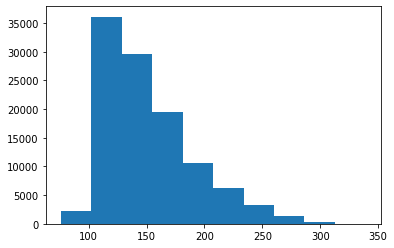

In [4]:
lengths = []
for i in data['essay']:
  l = i.split(' ')
  lengths.append(len(l))
plt.hist(lengths)
max(lengths)

Generate Model structure

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42,stratify=Y)
# convert to one hot encoing 
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(np.array(y_train).reshape(-1, 1))
y_train = enc.transform(np.array(y_train).reshape(-1, 1))
y_test = enc.transform(np.array(y_test).reshape(-1, 1))

#Encoding features

essay text data

In [7]:
X_train['essay'] =  X_train['essay'].str.replace('\d+', '')
X_test['essay'] =  X_test['essay'].str.replace('\d+', '')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [0]:
t = Tokenizer()
t.fit_on_texts(X_train['essay'])

X_train_essay = t.texts_to_sequences(X_train['essay'])
X_test_essay = t.texts_to_sequences(X_test['essay'])

X_train_essay = pad_sequences(X_train_essay, maxlen=340, padding='post')
X_test_essay = pad_sequences(X_test_essay,  maxlen=340, padding='post')

In [0]:
# load the whole embedding into memory
embeddings_index = dict()
f = open('folder/glove.6B.300d.txt')
for line in f:
	values = line.split()
	word = values[0]
	coefs = values[1:]
	embeddings_index[word] = coefs
f.close()

In [0]:
vocab_size = len(t.word_index) + 1
embedding_matrix = np.zeros((vocab_size, 300))
for word, i in t.word_index.items():
	embedding_vector = embeddings_index.get(word)
	if embedding_vector is not None:
		embedding_matrix[i] = embedding_vector
del embeddings_index

school_state

In [0]:
le = LabelEncoder()
le.fit(X_train['school_state'])
X_train_school_state = le.transform(X_train['school_state'])
X_test_school_state = le.transform(X_test['school_state'])

project_grade_category

In [0]:
le = LabelEncoder()
le.fit(X_train['project_grade_category'])
X_train_project_grade_category = le.transform(X_train['project_grade_category'])
X_test_project_grade_category = le.transform(X_test['project_grade_category'])

clean_categories	

In [0]:
le = LabelEncoder()
le.fit(X_train['clean_categories'])
X_train_clean_categories = le.transform(X_train['clean_categories'])
X_test_clean_categories = le.transform(X_test['clean_categories'])

clean_subcategories	

In [0]:
le = LabelEncoder()
s = list(set(X['clean_subcategories']))
count = 0
dic = {}
for i in s:
  dic[i] = count
  count = count + 1
X_train_clean_subcategories = X_train['clean_subcategories'].map(dic)
X_test_clean_subcategories  = X_test['clean_subcategories'].map(dic)

tacher_prefix

In [0]:
le = LabelEncoder()
le.fit(X_train['teacher_prefix'])
X_train_teacher_prefix = le.transform(X_train['teacher_prefix'])
X_test_teacher_prefix = le.transform(X_test['teacher_prefix'])

In [0]:
X_train_previousproject_price = X_train[['teacher_number_of_previously_posted_projects','price']]
X_test_previousproject_price = X_test[['teacher_number_of_previously_posted_projects','price']]

In [0]:
#total_text
input_layer1 = Input(shape=(340,))
embedding1 = Embedding(48955, 300,weights=[embedding_matrix], input_length=340)(input_layer1)  #56381
lstm = LSTM(64,return_sequences=True)(embedding1)
flatten1 = Flatten()(lstm)

#school_state
input_layer2 = Input(shape=(1,))
embedding2 = Embedding(51, 5, input_length=1)(input_layer2)
flatten2 = Flatten()(embedding2)

#project_grade_category
input_layer3 = Input(shape=(1,))
embedding3 = Embedding(4, 5, input_length=1)(input_layer3)
flatten3 = Flatten()(embedding3)

#clean_category
input_layer4 = Input(shape=(1,))
embedding4 = Embedding(51, 5, input_length=1)(input_layer4)
flatten4 = Flatten()(embedding4)

#clean_subcategories
input_layer5 = Input(shape=(1,))
embedding5 = Embedding(401, 20, input_length=1)(input_layer5)
flatten5 = Flatten()(embedding5)

#teacher_prefix
input_layer6 = Input(shape=(1,))
embedding6 = Embedding(5, 5, input_length=1)(input_layer6)
flatten6 = Flatten()(embedding6)

#price , teacher_number_of_previously_posted_projects
input_layer7 = Input(shape=(2,))
dense1 = Dense(2)(input_layer7)

merged = Concatenate(axis = -1)([flatten1,flatten2,flatten3,flatten4,flatten5,flatten6,dense1])
dense2 = Dense(128,activation = "sigmoid")(merged)

dense3 = Dense(64,activation = "sigmoid")(dense2)

dense4 = Dense(64,activation = "sigmoid")(dense3)

dense5 = Dense(32,activation = "sigmoid")(dense4)

dense6 = Dense(32,activation = "sigmoid")(dense5)

dense7 = Dense(32,activation = "sigmoid")(dense6)

output = Dense(2,activation = "softmax")(dense7)

metric

In [0]:
#Reference Link : https://stackoverflow.com/questions/37657260/how-to-implement-custom-metric-in-keras
import numpy as np
import tensorflow as tf
from sklearn.metrics import roc_auc_score
from sklearn.datasets import make_classification
from tensorflow import py_function
   
def auroc(y_true,y_pred):
  try:
    return tf.py_function(roc_auc_score , (y_true,y_pred) , tf.double)
  except ValueError:
      pass
  

In [0]:
y_train = y_train.todense()
y_test = y_test.todense()

In [20]:
import datetime
log_dir="logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1, write_graph=True,write_grads=True)

In [0]:
model = Model(inputs=[input_layer1,input_layer2,input_layer3,input_layer4,input_layer5,input_layer6,input_layer7],outputs=output)
model.compile(optimizer='adam', loss='binary_crossentropy',metrics=[auroc])

In [21]:
model.fit(
    [X_train_essay,X_train_school_state,X_train_project_grade_category,X_train_clean_categories,X_train_clean_subcategories,X_train_teacher_prefix ,X_train_previousproject_price],y_train ,
    validation_data = ([X_test_essay,X_test_school_state,X_test_project_grade_category,X_test_clean_categories,X_test_clean_subcategories,X_test_teacher_prefix ,X_test_previousproject_price],y_test),
     epochs = 14,batch_size=5000, callbacks=tensorboard_callback)

Epoch 1/14
17/17 [==============================] - 24s 1s/step - loss: 0.4501 - auroc: 0.4167 - val_loss: 0.4253 - val_auroc: 0.5076
Epoch 2/14
17/17 [==============================] - 23s 1s/step - loss: 0.4266 - auroc: 0.5797 - val_loss: 0.4264 - val_auroc: 0.5815
Epoch 3/14
17/17 [==============================] - 23s 1s/step - loss: 0.4255 - auroc: 0.5879 - val_loss: 0.4253 - val_auroc: 0.5786
Epoch 4/14
17/17 [==============================] - 23s 1s/step - loss: 0.4252 - auroc: 0.5884 - val_loss: 0.4251 - val_auroc: 0.5809
Epoch 5/14
17/17 [==============================] - 23s 1s/step - loss: 0.4251 - auroc: 0.5901 - val_loss: 0.4251 - val_auroc: 0.5837
Epoch 6/14
17/17 [==============================] - 23s 1s/step - loss: 0.4250 - auroc: 0.5919 - val_loss: 0.4250 - val_auroc: 0.5847
Epoch 7/14
17/17 [==============================] - 23s 1s/step - loss: 0.4249 - auroc: 0.5933 - val_loss: 0.4248 - val_auroc: 0.5897
Epoch 8/14
17/17 [==============================] - 23s 1s/ste

#Conclusion
Here Model1 gives 0.73 AUC value.

In [0]:
%load_ext tensorboard
%tensorboard --logdir logs/fit


### 1. Go through this blog, if you have any doubt on using predefined Embedding values in Embedding layer - https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/
### 2. Please go through this link https://keras.io/getting-started/functional-api-guide/ and check the 'Multi-input and multi-output models' then you will get to know how to give multiple inputs. 

### Model-2

Use the same model as above but for 'input_seq_total_text_data' give only some words in the sentance not all the words. Filter the words as below. 

<pre>
1. Train the TF-IDF on the Train data <br>
2. Get the idf value for each word we have in the train data. <br>
3. Remove the low idf value and high idf value words from our data. Do some analysis on the Idf values and based on those values choose the low and high threshold value. Because very frequent words and very very rare words don't give much information. (you can plot a box plots and take only the idf scores within IQR range and corresponding words)<br>
4. Train the LSTM after removing the Low and High idf value words. (In model-1 Train on total data but in Model-2 train on data after removing some words based on IDF values)
</pre>

In [0]:
del model

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(min_df = 1)

tfidf.fit(X_train['essay'])
response = tfidf.transform(X_train['essay'])

idf = tfidf.idf_
dic = dict(zip(tfidf.get_feature_names(), idf))

from collections import OrderedDict 
dict1 = {k: v for k, v in sorted(dic.items(), key=lambda item: item[1])}
print(len(dict1))

48928


In [0]:
count = 0
words = []
for key, value in dict1.items():
  count = count +1
  if(count> 10000 and count < 40000):
    words.append(key)

In [0]:
del dic , dict1

In [0]:
t = Tokenizer()
t.fit_on_texts(words)

X_train_essay = t.texts_to_sequences(X_train['essay'])
X_test_essay = t.texts_to_sequences(X_test['essay'])

X_train_essay = pad_sequences(X_train_essay, maxlen=340, padding='post')
X_test_essay = pad_sequences(X_test_essay,  maxlen=340, padding='post')

In [0]:
# load the whole embedding into memory
embeddings_index = dict()
f = open('folder/glove.6B.300d.txt')
for line in f:
	values = line.split()
	word = values[0]
	coefs = values[1:]
	embeddings_index[word] = coefs
f.close()

In [0]:
vocab_size = len(t.word_index) + 1
embedding_matrix = np.zeros((vocab_size, 300))
for word, i in t.word_index.items():
	embedding_vector = embeddings_index.get(word)
	if embedding_vector is not None:
		embedding_matrix[i] = embedding_vector
del embeddings_index

In [0]:
#total_text
input_layer1 = Input(shape=(340,))
#
embedding1 = Embedding(48955, 300,weights=[embedding_matrix], input_length=340)(input_layer1)  #56381
lstm = LSTM(64,return_sequences=True)(embedding1)
flatten1 = Flatten()(lstm)

#school_state
input_layer2 = Input(shape=(1,))
embedding2 = Embedding(51, 5, input_length=1)(input_layer2)
flatten2 = Flatten()(embedding2)

#project_grade_category
input_layer3 = Input(shape=(1,))
embedding3 = Embedding(4, 5, input_length=1)(input_layer3)
flatten3 = Flatten()(embedding3)

#clean_category
input_layer4 = Input(shape=(1,))
embedding4 = Embedding(51, 5, input_length=1)(input_layer4)
flatten4 = Flatten()(embedding4)

#clean_subcategories
input_layer5 = Input(shape=(1,))
embedding5 = Embedding(401, 20, input_length=1)(input_layer5)
flatten5 = Flatten()(embedding5)

#teacher_prefix
input_layer6 = Input(shape=(1,))
embedding6 = Embedding(5, 5, input_length=1)(input_layer6)
flatten6 = Flatten()(embedding6)

#price , teacher_number_of_previously_posted_projects
input_layer7 = Input(shape=(2,))
dense1 = Dense(2)(input_layer7)

merged = Concatenate(axis = -1)([flatten1,flatten2,flatten3,flatten4,flatten5,flatten6,dense1])
dense2 = Dense(128,activation = "sigmoid")(merged)

dense3 = Dense(64,activation = "sigmoid")(dense2)

dense4 = Dense(64,activation = "sigmoid")(dense3)

dense5 = Dense(32,activation = "sigmoid")(dense4)

dense6 = Dense(32,activation = "sigmoid")(dense5)

dense7 = Dense(32,activation = "sigmoid")(dense6)

output = Dense(2,activation = "softmax")(dense7)

In [0]:
model = Model(inputs=[input_layer1,input_layer2,input_layer3,input_layer4,input_layer5,input_layer6,input_layer7],outputs=output)
model.compile(optimizer='adam', loss='binary_crossentropy',metrics=[auroc])

In [1]:
model.fit(
    [X_train_essay,X_train_school_state,X_train_project_grade_category,X_train_clean_categories,X_train_clean_subcategories,X_train_teacher_prefix ,X_train_previousproject_price],y_train ,
    validation_data = ([X_test_essay,X_test_school_state,X_test_project_grade_category,X_test_clean_categories,X_test_clean_subcategories,X_test_teacher_prefix ,X_test_previousproject_price],y_test),
     epochs = 14,batch_size=5000, callbacks=tensorboard_callback)

Epoch 1/14
17/17 [==============================] - 24s 1s/step - loss: 0.4510 - auroc: 0.4167 - val_loss: 0.4255 - val_auroc: 0.5103
Epoch 2/14
17/17 [==============================] - 23s 1s/step - loss: 0.4272 - auroc: 0.5797 - val_loss: 0.4269 - val_auroc: 0.5792
Epoch 3/14
17/17 [==============================] - 23s 1s/step - loss: 0.4260 - auroc: 0.5879 - val_loss: 0.4254 - val_auroc: 0.5880
Epoch 4/14
17/17 [==============================] - 23s 1s/step - loss: 0.4252 - auroc: 0.5884 - val_loss: 0.4253 - val_auroc: 0.5881
Epoch 5/14
17/17 [==============================] - 23s 1s/step - loss: 0.4251 - auroc: 0.5901 - val_loss: 0.4251 - val_auroc: 0.5901
Epoch 6/14
17/17 [==============================] - 23s 1s/step - loss: 0.4250 - auroc: 0.5919 - val_loss: 0.4249 - val_auroc: 0.5914
Epoch 7/14
17/17 [==============================] - 23s 1s/step - loss: 0.4246 - auroc: 0.5933 - val_loss: 0.4242 - val_auroc: 0.5920
Epoch 8/14
17/17 [==============================] - 23s 1s/ste

#Conclusion
Here Model2 gives 0.76 AYC value.

### Model-3

<img src='https://i.imgur.com/fkQ8nGo.png'>
ref: https://i.imgur.com/fkQ8nGo.png


- __input_seq_total_text_data__: <br>
<pre>
    . Use text column('essay'), and use the Embedding layer to get word vectors. <br>
    . Use given predefined glove word vectors, don't train any word vectors. <br>
    . Use LSTM that is given above, get the LSTM output and Flatten that output. <br>
    . You are free to preprocess the input text as you needed. <br>
</pre>
- __Other_than_text_data__:<br>
<pre>
    . Convert all your Categorical values to onehot coded and then concatenate all these onehot vectors <br>
    . Neumerical values and use <a href='https://keras.io/getting-started/sequential-model-guide/#sequence-classification-with-1d-convolutions'>CNN1D</a> as shown in above figure. <br>
    . You are free to choose all CNN parameters like kernel sizes, stride.<br>
    
</pre>

In [0]:
# school_state
vectorizer = CountVectorizer()
vectorizer.fit(X_train['school_state'].values) 
X_train_school_state = vectorizer.transform(X_train['school_state'].values)
X_test_school_state = vectorizer.transform(X_test['school_state'].values)

# project_grade_category
vectorizer = CountVectorizer()
vectorizer.fit(X_train['project_grade_category'].values) 
X_train_project_grade_category = vectorizer.transform(X_train['project_grade_category'].values)
X_test_project_grade_category = vectorizer.transform(X_test['project_grade_category'].values)

# clean_categories
vectorizer = CountVectorizer()
vectorizer.fit(X_train['clean_categories'].values) 
X_train_project_clean_categories = vectorizer.transform(X_train['clean_categories'].values)
X_test_project_clean_categories = vectorizer.transform(X_test['clean_categories'].values)

#clean_subcategories
vectorizer = CountVectorizer()
clean_subcategories = vectorizer.fit_transform(X['clean_subcategories'].values)
X_train_clean_subcategories , X_test_clean_subcategories = train_test_split(clean_subcategories , test_size = 0.25) 

# teacher_prefix
vectorizer = CountVectorizer()
vectorizer.fit(X_train['teacher_prefix'].values) 
X_train_teacher_prefix = vectorizer.transform(X_train['teacher_prefix'].values)
X_test_teacher_prefix = vectorizer.transform(X_test['teacher_prefix'].values)

# price
normalizer = Normalizer()
normalizer.fit(X_train['price'].values.reshape(1,-1))
X_train_price_norm = normalizer.transform(X_train['price'].values.reshape(1,-1))
X_test_price_norm = normalizer.transform(X_test['price'].values.reshape(1,-1))

# teacher_number_of_previously_posted_projects
X_train_previousproject_price = X_train[['teacher_number_of_previously_posted_projects']]
X_test_previousproject_price = X_test[['teacher_number_of_previously_posted_projects']]

In [0]:
from scipy.sparse import coo_matrix, hstack
X_tr = hstack((X_train_school_state, X_train_project_grade_category, X_train_project_clean_categories, X_train_clean_subcategories,X_train_teacher_prefix, X_train_price_norm[0].reshape(-1,1), X_train_previousproject_price)).tocsr()

X_te = hstack((X_test_school_state, X_test_project_grade_category, X_test_project_clean_categories, X_test_clean_subcategories, X_test_teacher_prefix, X_test_price_norm[0].reshape(-1,1) ,X_test_previousproject_price)).tocsr()

Structure Model

In [0]:
input_layer1 = Input(shape=(340,))

embedding1 = Embedding(50477, 300,weights=[embedding_matrix] input_length=340)(input_layer1)  #56381
lstm = LSTM(64,return_sequences=True)(embedding1)
flatten1 = Flatten()(lstm)

input_layer2 = Input(shape=(101,1))
conv1 = Conv1D(30, 3, strides=1, padding='same', data_format='channels_last', dilation_rate=1, activation='relu')(input_layer2)
conv2 = Conv1D(30, 3, strides=1, padding='same', data_format='channels_last', dilation_rate=1, activation='relu')(conv1)
flatten2 = Flatten()(conv2)

merged = Concatenate(axis = -1)([flatten1,flatten2])

dense1 = Dense(128)(merged)
dense2 = Dense(64, activation="sigmoid")(dense1)
dense3 = Dense(64, activation="sigmoid")(dense2)
dense4 = Dense(32, activation="sigmoid")(dense3)
dense5 = Dense(32, activation="sigmoid")(dense4)
dense6 = Dense(32, activation="sigmoid")(dense5)
dense7 = Dense(32, activation="sigmoid")(dense6)
output = Dense(2 , activation="softmax")(dense7)

In [0]:
model = Model(inputs=[input_layer1,input_layer2],outputs=output)
model.compile(optimizer='adam', loss='binary_crossentropy',metrics=[auroc])

In [0]:
X_tr1 = X_tr.todense()
X_te1 = X_te.todense()

In [56]:
import datetime
log_dir="logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1, write_graph=True,write_grads=True)

In [2]:
model.fit(
    [X_train_essay,X_tr1],y_train ,
    validation_data = ([X_test_essay,X_te1],y_test),
     epochs = 15,batch_size=5000,callbacks = tensorboard_callback)


Epoch 1/4
4/4 [==============================] - 22s 1s/step - loss: 0.4220 - auroc: 0.7198 - val_loss: 0.4203 - val_auroc: 0.6983
Epoch 2/4
4/4 [==============================] - 22s 1s/step - loss: 0.4149 - auroc: 0.7249 - val_loss: 0.4182 - val_auroc: 0.7003
Epoch 3/4
4/4 [==============================] - 22s 1s/step - loss: 0.3902 - auroc: 0.7301 - val_loss: 0.4096 - val_auroc: 0.7088
Epoch 4/4
4/4 [==============================] - 22s 1s/step - loss: 0.3782 - auroc: 0.7382 - val_loss: 0.3932 - val_auroc: 0.7112



#conclusion
Here Model3 gives around 0.71 AUC value

In [0]:
%reload_ext tensorboard
%tensorboard --logdir logs/fit

#Final Conclusion
finnaly we can conclude that model2 gives better result because in model 2 we have removed  unnacessary words.